# Imports

In [1]:
import pandas as pd

# Constans

In [2]:
#other constants.
HEAD_ROWS_TO_SHOW = 15

# Data load

In [3]:
df = pd.read_csv('logs_mp_october_test_task.csv')
df[:HEAD_ROWS_TO_SHOW]

,Unnamed: 0,user_id,device_id,event_date,track_id
0,0,301766,555a04204e85a34b,2019-10-31 04:24:36,10
1,1,7599993,341a3dd038c9f962,2019-10-31 04:24:50,10
2,2,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:24:54,10
3,3,301766,555a04204e85a34b,2019-10-31 04:25:05,10
4,4,20736809,21c2843aeef5931d,2019-10-31 04:25:07,10
5,5,7599993,341a3dd038c9f962,2019-10-31 04:25:22,10
6,6,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:31,10
7,7,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:49,10
8,8,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:57,10
9,9,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:26:37,10


In [4]:
df = df.drop('Unnamed: 0', 1) # где 1 – номер оси ( 0 для строк и 1 для столбцов).

df[:HEAD_ROWS_TO_SHOW]
 

,user_id,device_id,event_date,track_id
0,301766,555a04204e85a34b,2019-10-31 04:24:36,10
1,7599993,341a3dd038c9f962,2019-10-31 04:24:50,10
2,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:24:54,10
3,301766,555a04204e85a34b,2019-10-31 04:25:05,10
4,20736809,21c2843aeef5931d,2019-10-31 04:25:07,10
5,7599993,341a3dd038c9f962,2019-10-31 04:25:22,10
6,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:31,10
7,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:49,10
8,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:25:57,10
9,26828853,463BAFCE-3E8B-499A-8B93-1AD693CC5749,2019-10-31 04:26:37,10


# Analyze of data types

In [5]:
df.dtypes

user_id        int64
device_id     object
event_date    object
track_id       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20528834 entries, 0 to 20528833
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   device_id   object
 2   event_date  object
 3   track_id    int64 
dtypes: int64(2), object(2)
memory usage: 626.5+ MB


In [7]:
df.shape

(20528834, 4)

# Задание 1: 
### Какой экран самый популярный у пользователей ?
### (кроме главного экрана, track_id = 4)
### И сколько пользователей его посетило ? 

In [18]:
df['track_id'].value_counts()[:HEAD_ROWS_TO_SHOW]

# Расшифровка кода:
# value_counts(). - позволяет посчитать количество уникальных записей, т.е. кол-во открытий экрана, но не кол-во пользователей;
# [:HEAD_ROWS_TO_SHOW] - показывает, сколько значений выводить

4      6617992
1      1596700
2      1333464
10     1294088
135    1126620
9      1067211
6       734236
7       660980
5       647325
210     434089
225     369885
46      296064
34      276643
14      270757
33      266142
Name: track_id, dtype: int64

<AxesSubplot:>

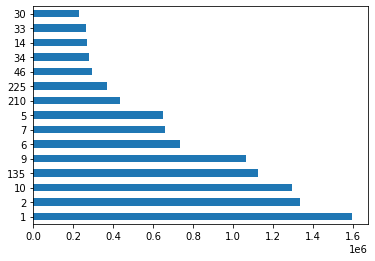

In [9]:
df[df.track_id != 4]['track_id'].value_counts()[:HEAD_ROWS_TO_SHOW].plot.barh()

In [11]:
df_group = df[df.track_id != 4].groupby(['track_id'])[['user_id']].nunique() # группировка, сколько уникальных пользователей посетили тот или иной экран;
df_group.sort_values(by=['user_id'], ascending=False).head()                 # сортировка от большего к меньшему по числу пользователей.

,user_id
track_id,
6,197166
10,140956
1,129028
30,104628
135,102992


# Ответ: 1 экран - самый популярный.
# Его посетили 129028 пользователей.

# _______________________________

# Задание 2:

### Какая доля пользователей посетила экран тех.поддержки ?
### (track_id = 20)

In [12]:
# как узнать сколько всего уникальных пользователей:
df['user_id'].nunique()

307736

In [13]:
# как узнать, сколько уникальных пользователей посетило track_id = 20 :

# Аналог Where
df_filter = df ['track_id']. isin (['20']) 
# Группировка
df [df_filter]['user_id'].nunique()

46256

In [14]:
# Узнаём долю людей, посетивших track_id = 20
share_of_users = df [df_filter]['user_id'].nunique() / df['user_id'].nunique()
share_of_users 

0.15031065588686407

# Ответ: 15% людей обратились в тех.поддержку